## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

### Main Dataset

In [2]:
# Main dataset
data_df = pd.read_csv("./Data/Dirty/dataset.csv")
data_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Number of target variables
data_df['Disease'].nunique()

41

In [4]:
data_df['Disease'].value_counts()[:5]

Fungal infection       120
Hepatitis C            120
Hepatitis E            120
Alcoholic hepatitis    120
Tuberculosis           120
Name: Disease, dtype: int64

In [5]:
# All diseases have a sample size of n=120
data_df['Disease'].value_counts().nunique()

1

In [6]:
# Last column contains values
data_df['Symptom_17'].value_counts()

 muscle_pain    72
Name: Symptom_17, dtype: int64

In [7]:
# A more rigorous confirmation that no symptom columns contain only NaN
empty_bool = True

for col in data_df.columns[1:]:
    if data_df[col].value_counts().empty == True:
        print(col)
        empty_bool = False
        
if empty_bool: print('No columns are empty.')

No columns are empty.


In [8]:
# Confirm that the .value_counts() of a column with only NaN is empty
test_df = pd.DataFrame({'column': [np.nan] * 3})
print(test_df)

test_df['column'].value_counts().empty

   column
0     NaN
1     NaN
2     NaN


True

In [9]:
# List of symptom column names from data_df
symptom_cols = data_df.columns.to_list()[1:]

# Get values from symptom columns as an array
symptom_values = data_df[symptom_cols].values.astype(str)

# Get list of unique values from array
symptom_list = list(np.unique(symptom_values))
symptom_list.remove('nan')
symptom_list[:5]

[' abdominal_pain',
 ' abnormal_menstruation',
 ' acidity',
 ' acute_liver_failure',
 ' altered_sensorium']

In [10]:
# Get list of unique Disease values from data_df
disease_data_list = list(np.unique(data_df['Disease'].values.astype(str)))
disease_data_list[:5]

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy']

In [11]:
# Find diseases in data_df with leading or trailing whitespace
for value in disease_data_list:
    if value.startswith(" ") or value.endswith(" "):
        print(value)

Diabetes 
Hypertension 


In [12]:
# Strip all values in data_df of leading or trailing whitespace
for col in data_df.columns:
    data_df[col] = data_df[col].str.strip()

In [13]:
# Check that values in all columns have been stripped
strip_bool = True

for col in data_df:
    if (data_df[col].str.startswith(" ").any() or
        data_df[col].str.endswith(" ").any()):
        print(col)
        strip_bool = False
        
if strip_bool: print('No leading or trailing whitespace found.')

No leading or trailing whitespace found.


### Symptom Severity

In [14]:
# Symptom severity
severity_df = pd.read_csv('./Data/Dirty/symptom_severity.csv')
severity_df.tail()

,Symptom,weight
127,small_dents_in_nails,2
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [15]:
# Compare number of symptoms in dataset to those in severity_df
print(len(symptom_list))

print(len(severity_df['Symptom']))

131
132


In [16]:
# Find duplicated symptoms in severity_df
severity_df[severity_df['Symptom'].duplicated()]

,Symptom,weight
117,fluid_overload,4


In [17]:
# Look at both duplicate records
severity_df.loc[severity_df['Symptom'] == 'fluid_overload']

,Symptom,weight
45,fluid_overload,6
117,fluid_overload,4


In [18]:
# Drop duplicate and replace weight of remaining record with the average, '5'
severity_df = severity_df.drop_duplicates(subset='Symptom')

fluid_exp = severity_df['Symptom'] == 'fluid_overload'
severity_df.loc[fluid_exp, 'weight'] = '5'
severity_df.loc[fluid_exp]

,Symptom,weight
45,fluid_overload,5


In [19]:
# Convert symptom severity weights to integers
severity_df['weight'] = severity_df['weight'].astype('int')
severity_df.dtypes

Symptom    object
weight      int32
dtype: object

In [20]:
# Sort symptoms by weight to view comparatively
severity_df = severity_df.sort_values(by='weight', ascending=False)
severity_df = severity_df.reset_index(drop=True)
severity_df

,Symptom,weight
0,coma,7
1,high_fever,7
2,swelling_of_stomach,7
3,chest_pain,7
4,weakness_in_limbs,7
...,...,...
126,receiving_unsterile_injections,2
127,hip_joint_pain,2
128,muscle_weakness,2
129,irritability,2


<AxesSubplot:>

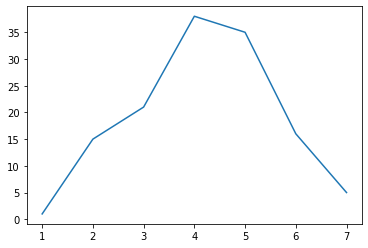

In [21]:
# Check distribution of symptom severity weights
# Weights roughly follow a normal distribution
weight_freq = severity_df['weight'].value_counts().sort_index()
weight_freq.plot()

### Disease Descriptions

In [22]:
# Disease descriptions
desc_df = pd.read_csv('./Data/Dirty/disease_description.csv')
desc_df.tail()

,Disease,Description
36,Heart attack,The death of heart muscle due to the loss of b...
37,Pneumonia,Pneumonia is an infection in one or both lungs...
38,Arthritis,Arthritis is the swelling and tenderness of on...
39,Gastroenteritis,Gastroenteritis is an inflammation of the dige...
40,Tuberculosis,Tuberculosis (TB) is an infectious disease usu...


### Disease Precautions

In [23]:
# Disease precautions
precaution_df = pd.read_csv('./Data/Dirty/disease_precaution.csv')
precaution_df.tail()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
36,Heart attack,call ambulance,chew or swallow asprin,keep calm,NaN
37,Pneumonia,consult doctor,medication,rest,follow up
38,Arthritis,exercise,use hot and cold therapy,try acupuncture,massage
39,Gastroenteritis,stop eating solid food for while,try taking small sips of water,rest,ease back into eating
40,Tuberculosis,cover mouth,consult doctor,medication,rest


In [24]:
# List of precaution column names from precaution_df
precaution_cols = precaution_df.columns.to_list()[1:]

# Get values from precaution columns as an array
precaution_values = precaution_df[precaution_cols].values.astype(str)

# Get list of unique values from array
precaution_list = list(np.unique(precaution_values))
precaution_list[:5]

['Consult nearest hospital',
 'acetaminophen',
 'anti itch medicine',
 'antiboitic therapy',
 'apply calamine']

### Replace Values in all DataFrames

In [25]:
# Replace precaution values
precaution_replace = {
    "anti itch medicine": "anti-itch medicine",
    "antiboitic therapy": "antibiotics",
    "apply calamine": "apply calamine lotion",
    "avoid abrupt head movment": "avoid abrupt head movement",
    "avoid non veg food": "avoid non-vegeterian food",
    "avoid sudden change in body": "avoid sudden body movements",
    "avoid too many products": "avoid too many skincare products",
    "bath twice": "bathe twice",
    "check in pulse": "check pulse",
    "chew or swallow asprin": "chew or swallow aspirin",
    "Consult nearest hospital": "consult nearest hospital",
    "consume alovera juice": "consume aloe vera juice",
    "consume milk thistle": "drink vitamin c rich drinks",
    "dont stand still for long": "don't stand still for long",
    "eat fruits and high fiberous food": "eat fruits and foods high in fiber",
    "eat high calorie vegitables": "eat high-calorie vegetables",
    "follow up": "follow up with doctor",
    "keep mosquitos out": "keep mosquitos away",
    "salt baths": "warm bath with epsom salt",
    "switch to loose cloothing": "loosen clothing",
    np.NaN: "loosen clothing",  # precaution for heart attack
    "take otc pain reliver": "take OTC pain reliever",
    "take vapour": "steam inhalation",
    "use detol or neem in bathing water": "use oil of tea tree or peppermint in bathwater",
    "use neem in bathing ": "use oil of tea tree or peppermint in bathwater",
    "use oinments": "use ointments",
    "use poloroid glasses in sun": "use polarized glasses in sun",
    "wash hands through": "wash hands thoroughly",
    "wash hands with warm soapy water": "wash hands thoroughly",
    "wear ppe if possible": "wear PPE if possible"
}

precaution_df = precaution_df.replace(precaution_replace)

In [26]:
# Replace symptoms in data_df and severity_df
symptom_replace = {
    "acidity": "heartburn",
    "scurring": "scarring",
    "diarrhoea": "diarrhea",
    "cold_hands_and_feets": "cold_hands_and_feet",
    "swollen_extremeties": "swollen_extremities",
    "foul_smell_ofurine": "foul_smell_of_urine",
    "altered_sensorium": "altered_mental_state",
    "dischromic_patches": "mottling_skin",
    "polyuria": "excessive_urination",
    "burning_micturition": "painful_urination",
    "silver_like_dusting": "blue-gray_complexion_(argyria)",
    "pus_filled_pimples": "pus-filled_pimples",
    "toxic_look_(typhos)": "toxic_look_(toxemia)",
    "yellow_crust_ooze": "yellow_oozing_scabs"
}

for df in [data_df, severity_df]:
    # Create list of columns containing symptoms
    symptom_cols = [col for col in df.columns if "Symptom" in col]

    # Remove any whitespace in symptom
    df[symptom_cols] = df[symptom_cols].replace(' ', '', regex=True)
    
    # Replace values according to dictionary
    df[symptom_cols] = df[symptom_cols].replace(symptom_replace)

    # Replace "_" with whitespace " "
    df[symptom_cols] = df[symptom_cols].replace('_', ' ', regex=True)

In [27]:
# Replace 'Disease' in data_df, desc_df, precaution_df
# force lowercase for all diseases except AIDS & GERD
disease_replace = {
    "Dimorphic hemorrhoids(piles)": "Hemorrhoids",
    "Dimorphic hemmorhoids(piles)": "Hemorrhoids",
    "Bronchial Asthma": "Bronchial asthma",
    "Common Cold": "Common cold",
    "Drug Reaction": "Drug reaction",
    "Paralysis (brain hemorrhage)": "Brain hemorrhage",
    "(vertigo) Paroymsal  Positional Vertigo": "Positional vertigo",
    "Osteoarthristis": "Osteoarthritis",
    "Typhoid": "Typhoid fever",
    "Peptic ulcer diseae": "Peptic ulcer disease"
}

for df in [data_df, desc_df, precaution_df]:
    # Strip any preceding and trailing whitespace
    data_df[col] = data_df[col].str.strip()

    # Replace values according to dictionary
    df['Disease'] = df['Disease'].replace(disease_replace)

    # Lowercase first letter of disease if not acronym
    df['Disease'] = df['Disease'].apply(
        lambda x: x if x in ('GERD', 'AIDS')\
        else x[0].lower() + x[1:]
    )

### Export Cleaned Data

In [28]:
# Save each DataFrame as .csv in Cleaned folder
file_names = {
    'dataset': data_df,
    'disease_description': desc_df,
    'disease_precaution': precaution_df,
    'symptom_severity': severity_df
}

for filename in file_names:
    filepath = f"./Data/Cleaned/{filename}_clean.csv"
    file_names[filename].to_csv(filepath, index=False)

In [29]:
# Export to SQL database
import urllib.parse
from sqlalchemy import create_engine
import psycopg2

import sys, os
# Add location of config.py in grandparent folder to sys.path
sys.path.append(os.path.abspath(os.path.join('../..')))
from config import db_password, db_username, db_port

# Store SQL connection string
db_string = f"postgresql://{db_username}:{urllib.parse.quote(db_password)}\
@127.0.0.1:{db_port}/disease_prediction"

sql_dfs = {
    'disease_cases': data_df,
    'disease_description': desc_df,
    'disease_precautions': precaution_df,
    'symptom_severity': severity_df
}

# Connect to SQL database
# Use 'with' to let Python's context manager call Connection.close()
with create_engine(db_string).connect() as engine:
    # Save DataFrames as SQL tables
    for table_name in sql_dfs:
        try:
            sql_dfs[table_name].to_sql(name=table_name,
            con=engine,
            if_exists='fail',
            index=False,
            )
        except ValueError:
            continue